<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/Phase_envelopes_of_oil_and_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Phase enevelopes of oil and gas
#@markdown Demonstration of phase envelopes of gas and oil
#!git clone https://github.com/EvenSol/NeqSim-Colab.git
!pip install py4j
!pip install NeqSim-Colab/lib/neqsim-0.0.1-py3-none-any.whl

In [0]:
#@title Import packages
#@markdown Imports packages such as neqsim, numpy, matplotlib etc.
import neqsim
import time
time.sleep(3)
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

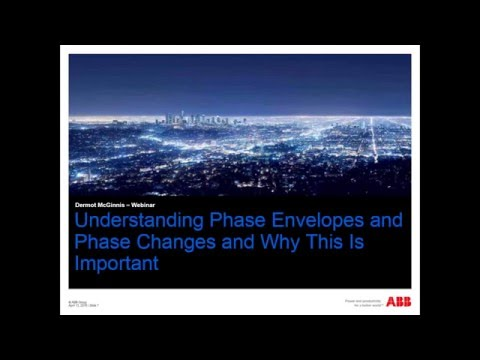

In [3]:
#@title Introduction to Phase Envelopes
#@markdown This video gives an intriduction to behavour phase envelopes and phase changes and why this is Important
from IPython.display import YouTubeVideo
YouTubeVideo('OUS-ER3eemI', width=600, height=400)

#Calculation of phase behaviour of single components
Calculate the vapour pressure curve of a single component from the triple point temperature up to the critical point

triple point temperature  90.69 [K] and pressure  0.116656057 [bara]
critical temperature  190.55999999999997 [K] and pressure  45.99 [bara]


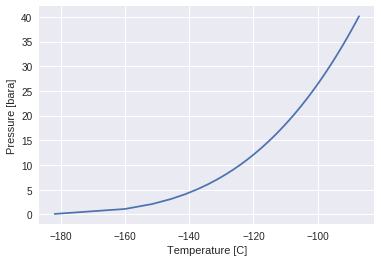

In [4]:
camponentName = "methane" #@param ["methane", "ethane", "propane", "i-butane", "n-butane"]
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent(camponentName, 1.0) #adding 1 mole methane to the fluid

TTrip = fluid1.getPhase(0).getComponent(camponentName).getTriplePointTemperature()
PTrip = fluid1.getPhase(0).getComponent(camponentName).getTriplePointPressure()
Tcritical = fluid1.getPhase(0).getComponent(camponentName).getTC()
Pcritical = fluid1.getPhase(0).getComponent(camponentName).getPC()

fluid1.setTemperature(TTrip)
fluid1.setPressure(PTrip)
print('triple point temperature ', TTrip, "[K] and pressure ", PTrip, "[bara]")
print('critical temperature ', Tcritical, "[K] and pressure ", Pcritical, "[bara]")

def bubleP(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(PTrip, Pcritical-5.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure);
plt.xlabel('Temperature [C]');
plt.ylabel('Pressure [bara]');

#Calculation of Px diagram of binary mixtures
Calculation of VLE phase diagrams of binary mixtures.

In [5]:
bubtemp = []
dewtemp = []
x = []
y = []
x2 = []
y2 = []
comp1 = "propane" #@param ["methane", "ethane", "propane", "i-butane", "n-butane"]
comp2 = "i-butane" #@param ["methane", "ethane", "propane", "i-butane", "n-butane"]
pressure = 1.0  #@param {type:"number"}

Tcritical = fluid1.getPhase(0).getComponent(comp2).getTC()
Pcritical = fluid1.getPhase(0).getComponent(comp2).getPC()


fluid1 = fluid('srk')
addComponent(fluid1, comp1,0.000001)
addComponent(fluid1, comp2,1.01)
fluid1.setMixingRule('classic')
fluid1.setTemperature(Tcritical/2.0)
fluid1.setPressure(pressure)

try:
    for temp in range(0,11):
        bubtemp.append(bubt(fluid1)-273.15)
        dewtemp.append(dewt(fluid1)-273.15)
        fluid1.init(0)
        x.append(fluid1.getPhase(0).getComponent(0).getz())
        fluid1.addComponent(comp2, -0.1)
        fluid1.addComponent(comp1, 0.1)
except:
        print('no dewt found')

plt.plot(x, bubtemp, label='bubT')
plt.plot(x, dewtemp, label="dewT")
plt.xlabel('x [mol frac]')
plt.ylabel('Temperature [C]')

KeyboardInterrupt: ignored

#Calculation of phase envelope of a lean gas reservoir
A gas reservoir is dominated by light components, and generally contain low amounts of C7+ components.

In [0]:
nitrogen = 2.5 #@param {type:"number"}
CO2 = 2.5 #@param {type:"number"}
methane = 85.0  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  2.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}

thermoSystem = neqsim.thermo.system.SystemSrkEos(280.0,10.0)
thermoSystem.addComponent("nitrogen", nitrogen)
thermoSystem.addComponent("CO2", CO2)
thermoSystem.addComponent("methane", methane)
thermoSystem.addComponent("ethane", ethane)
thermoSystem.addComponent("propane", propane)
thermoSystem.addComponent("i-butane", ibutane)
thermoSystem.addComponent("n-butane", nbutane)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(thermoSystem)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()